In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import matplotlib.pyplot as plt
import seaborn as sns

model_name = "dreamgen/WizardLM-2-7B"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, output_attentions=True).eval()

tokenizer_config.json:   0%|          | 0.00/970 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:774: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_attentions` is. When `return_dict_in_generate` is not `True`, `output_attentions` is ignored.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

# All Attention Heads

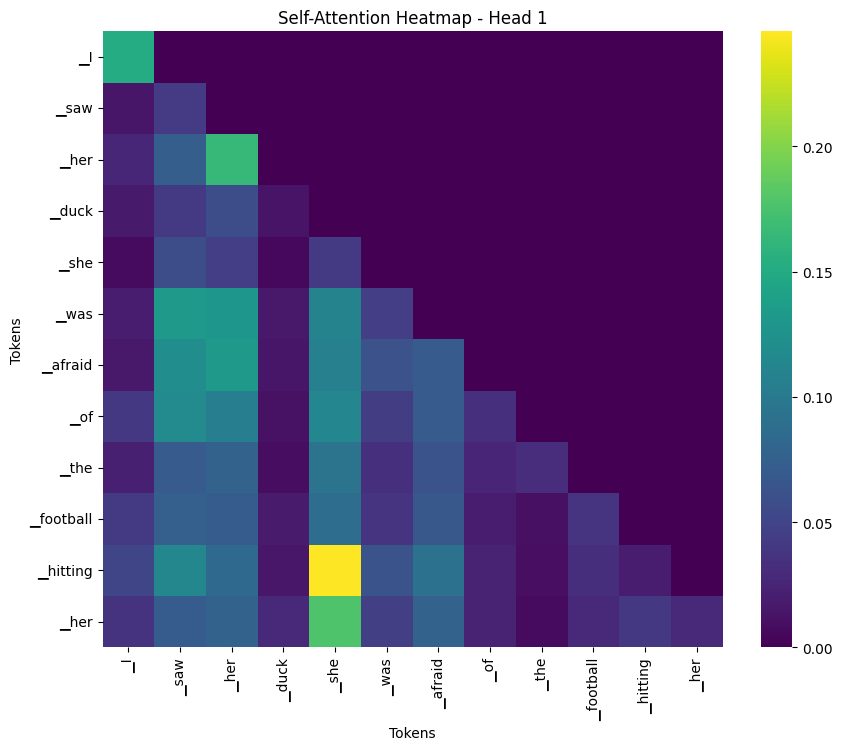

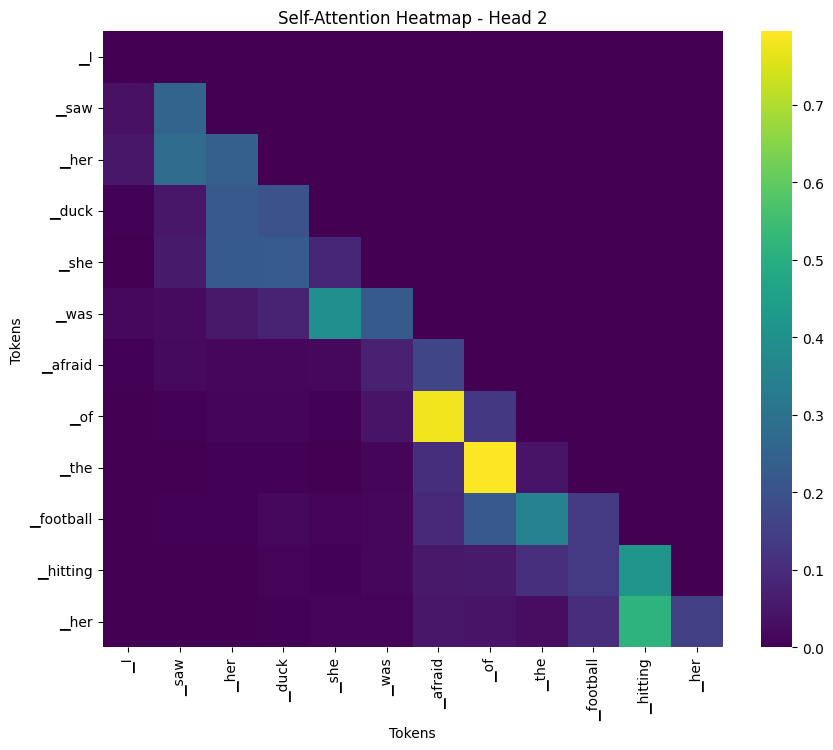

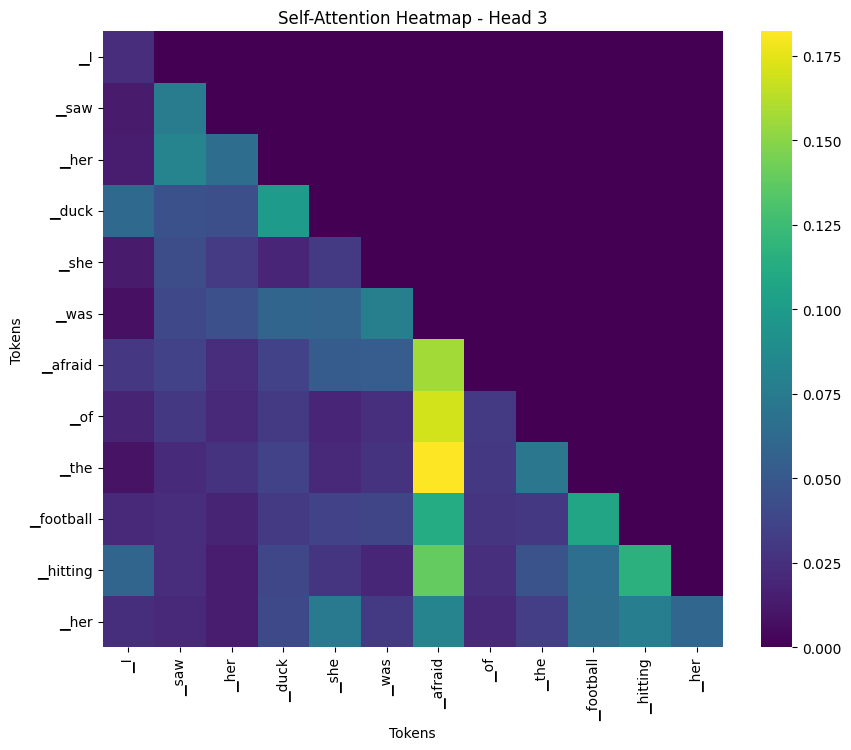

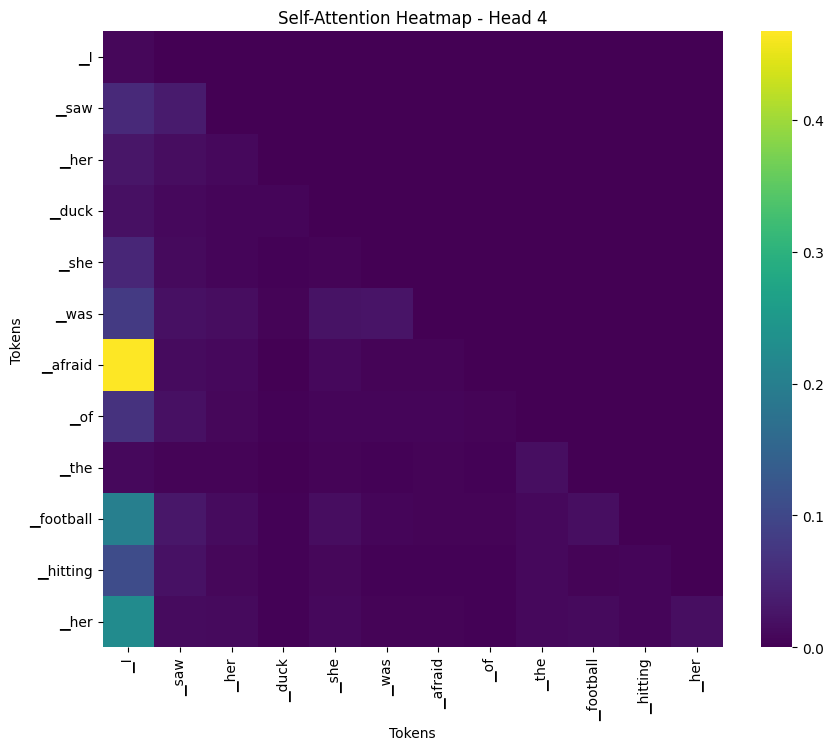

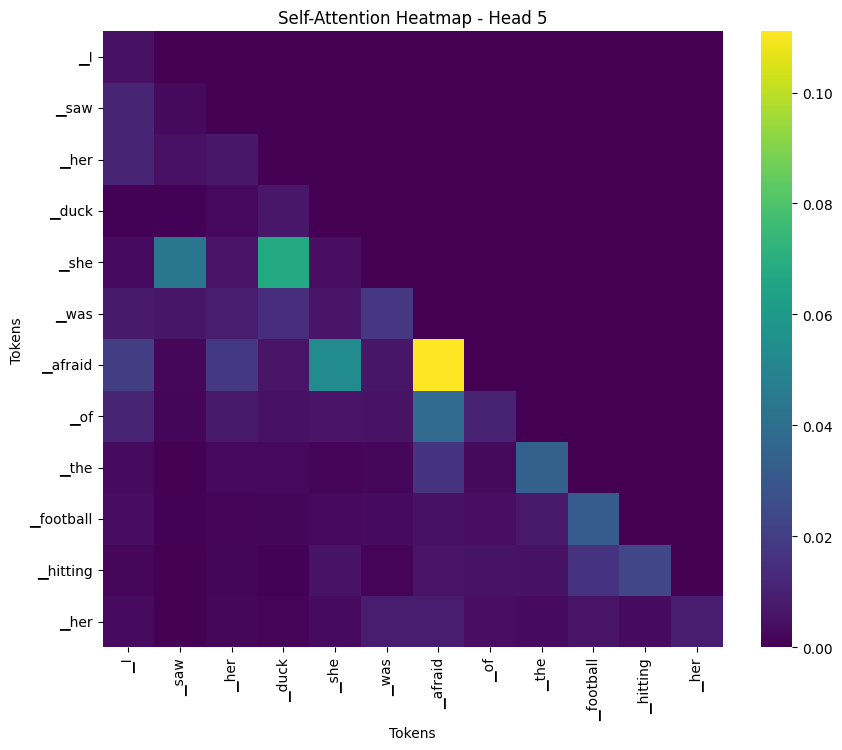

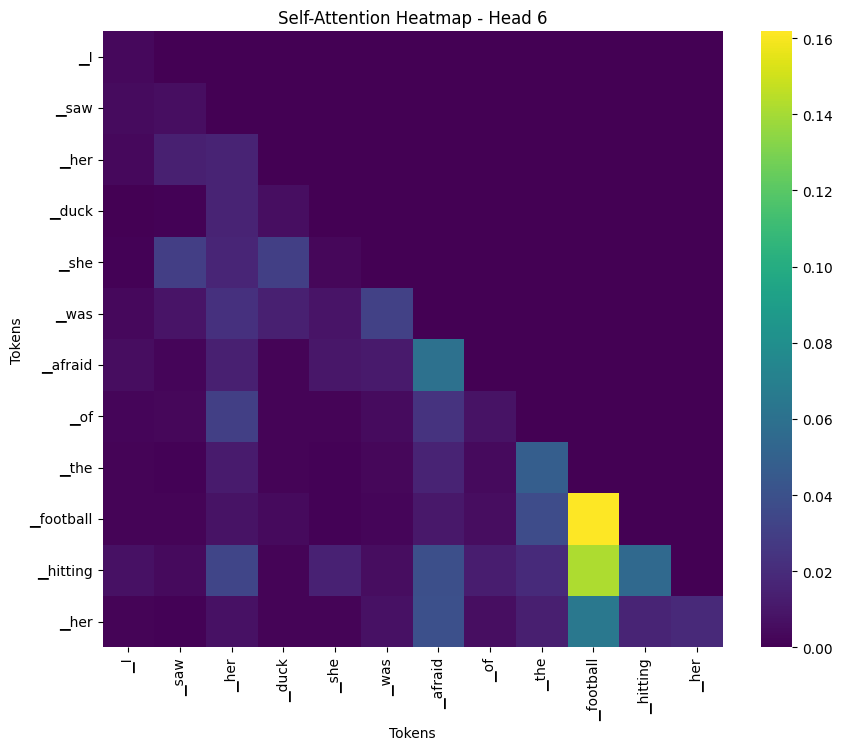

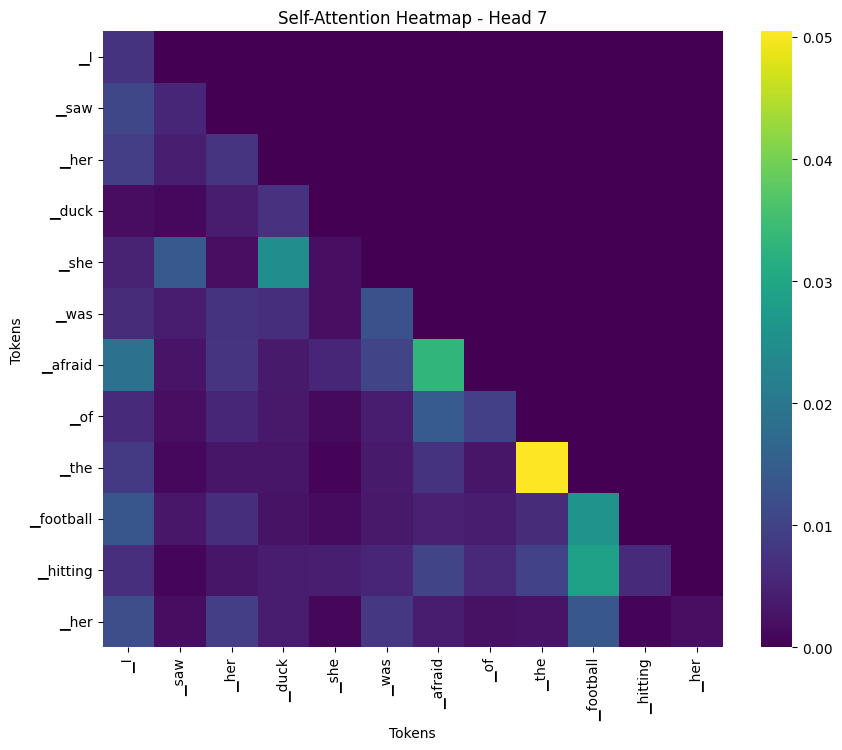

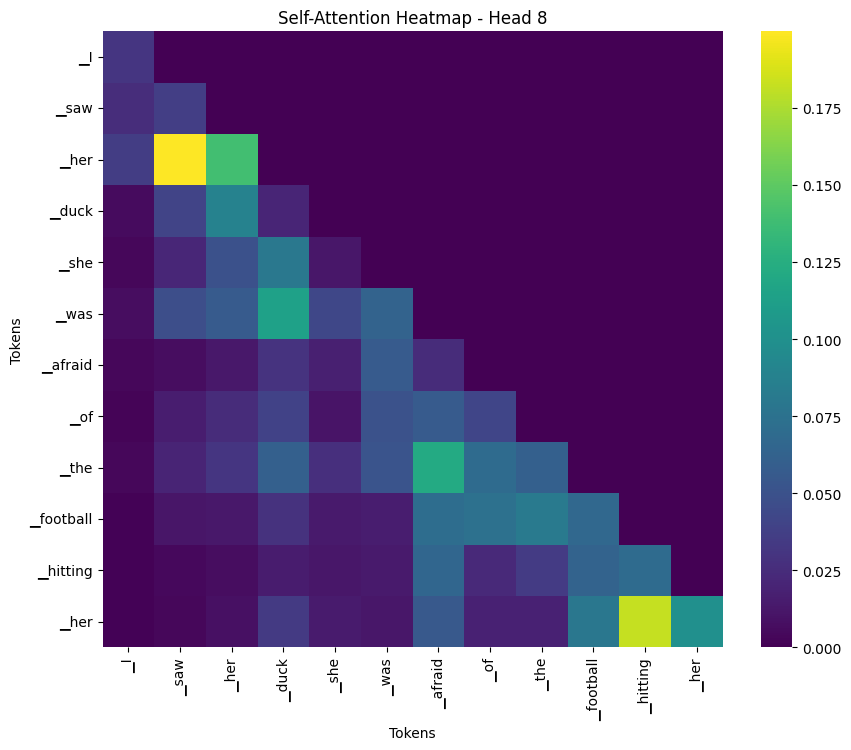

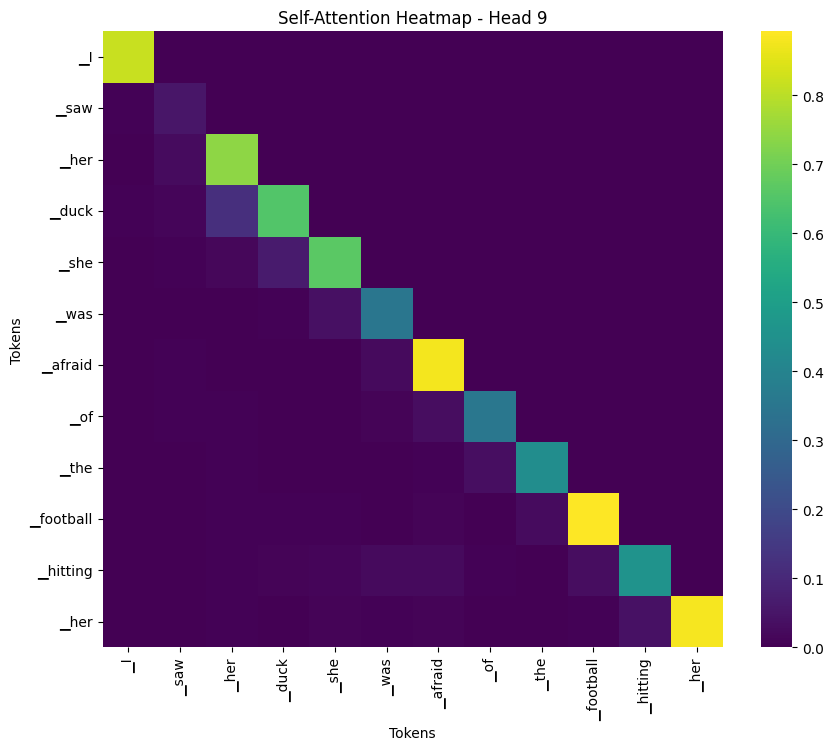

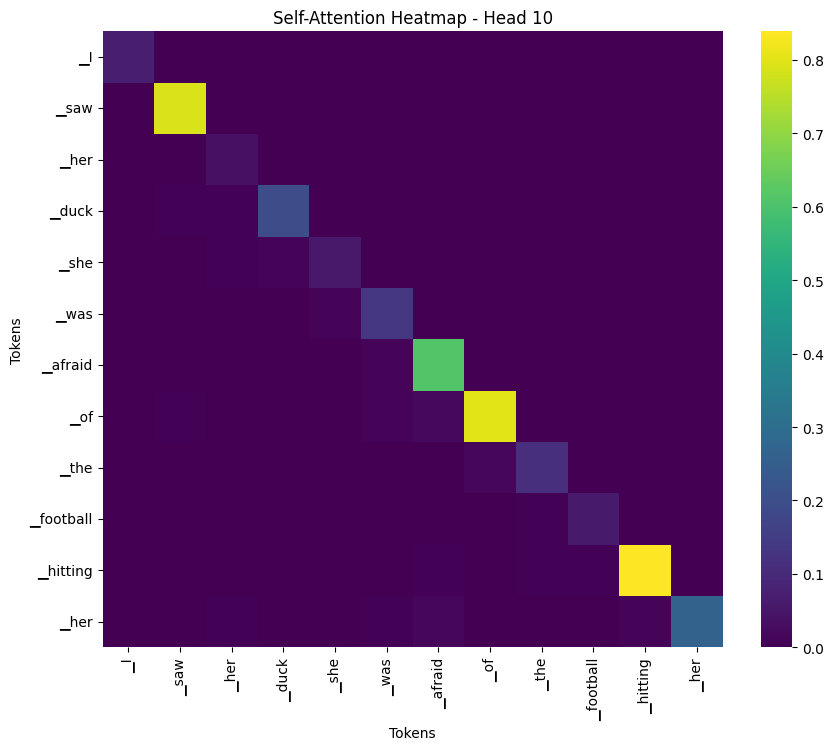

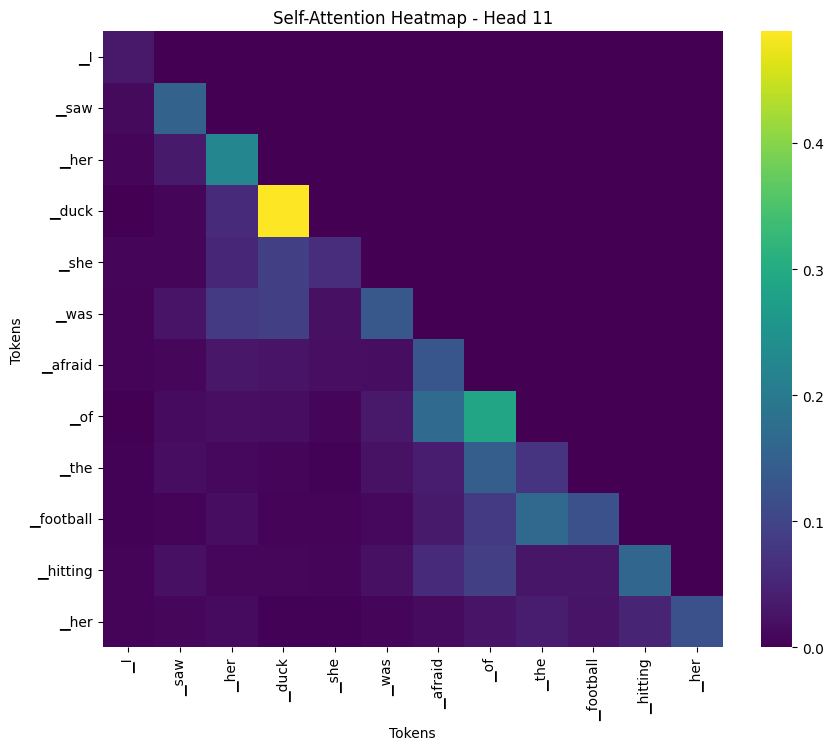

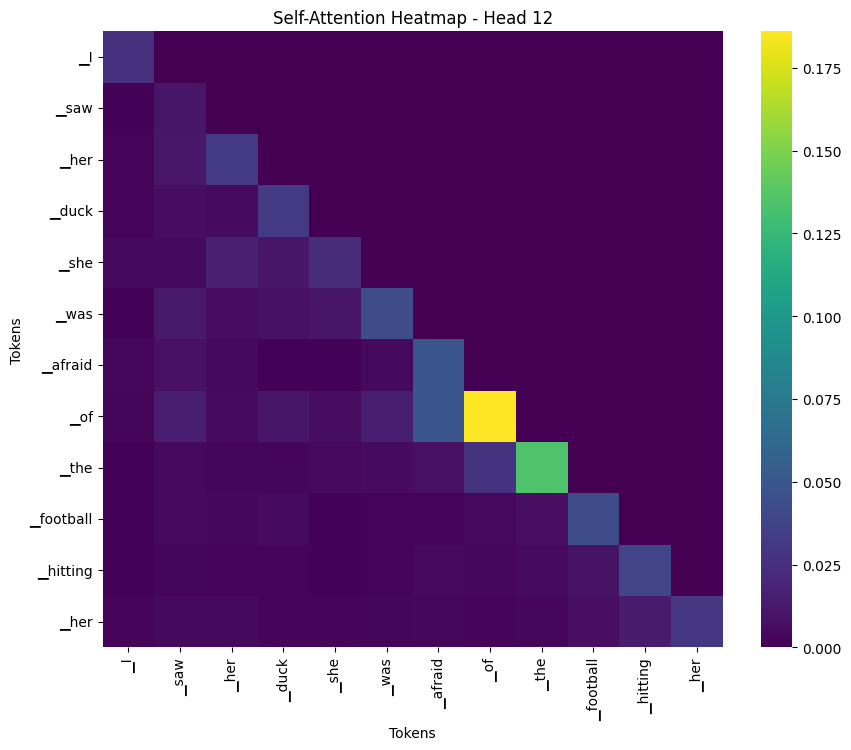

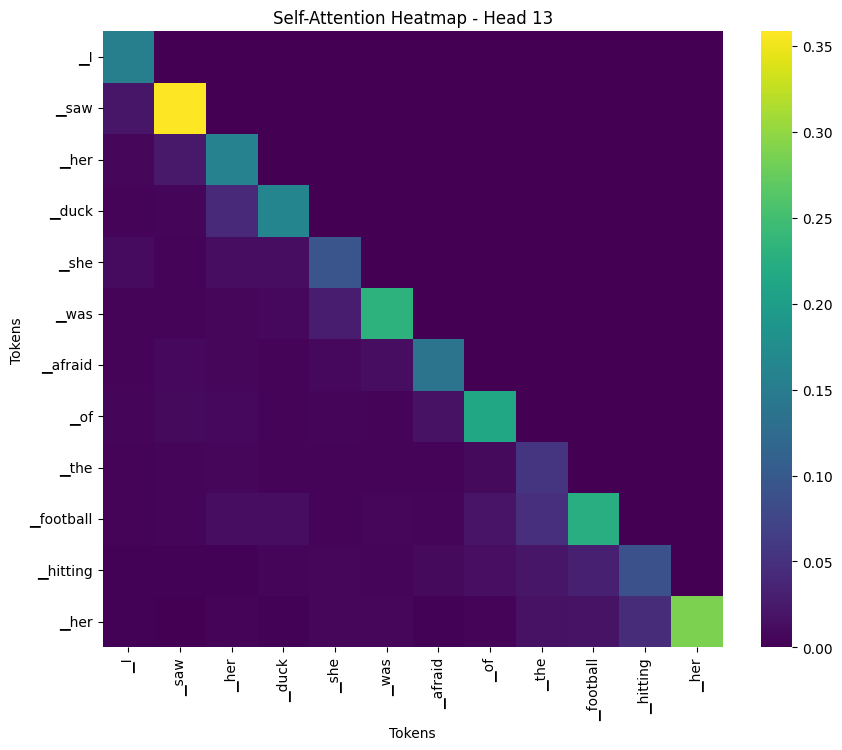

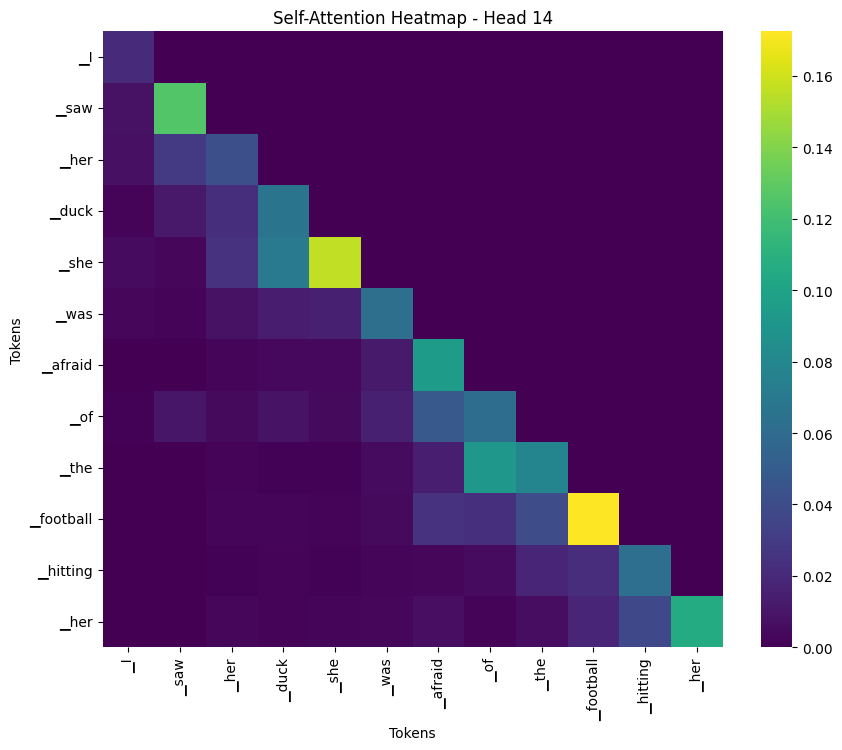

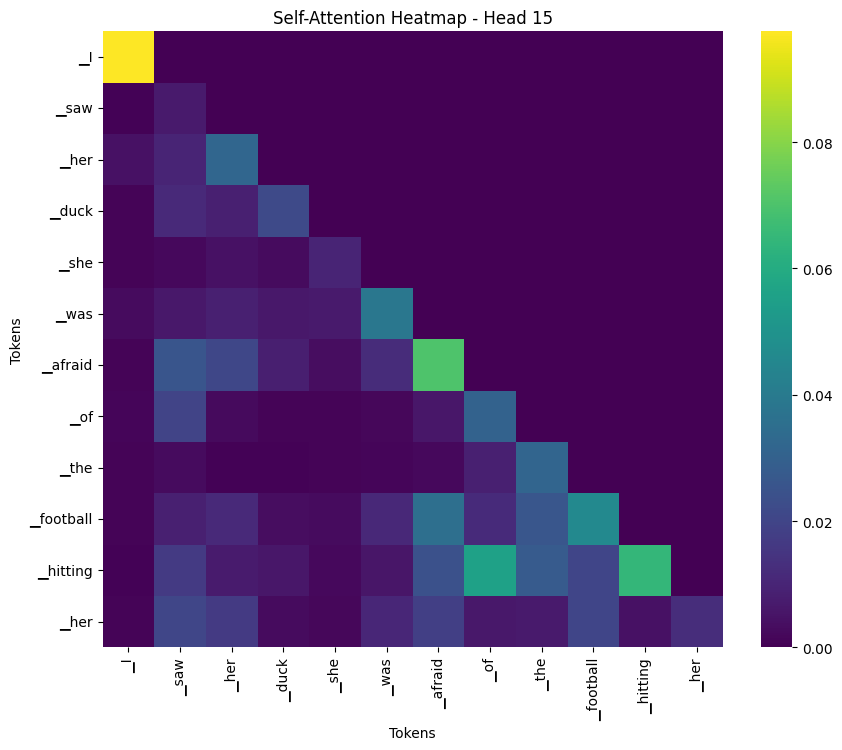

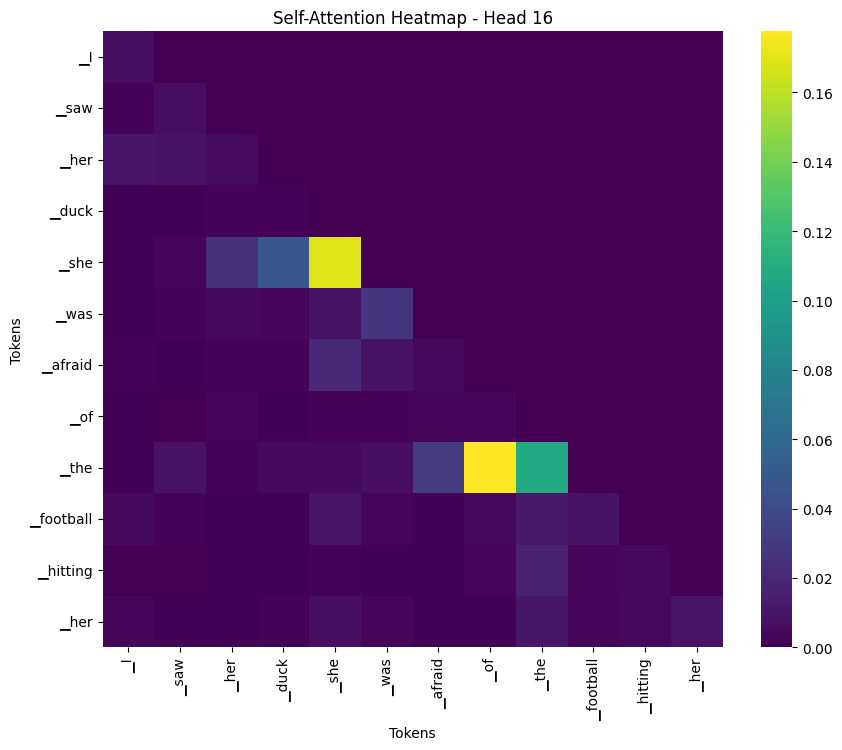

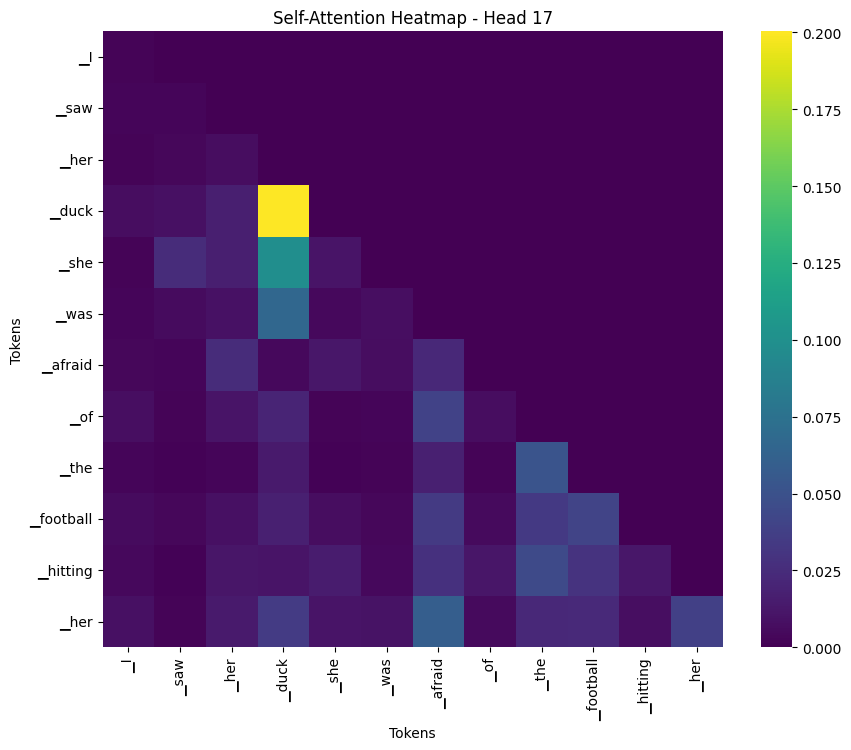

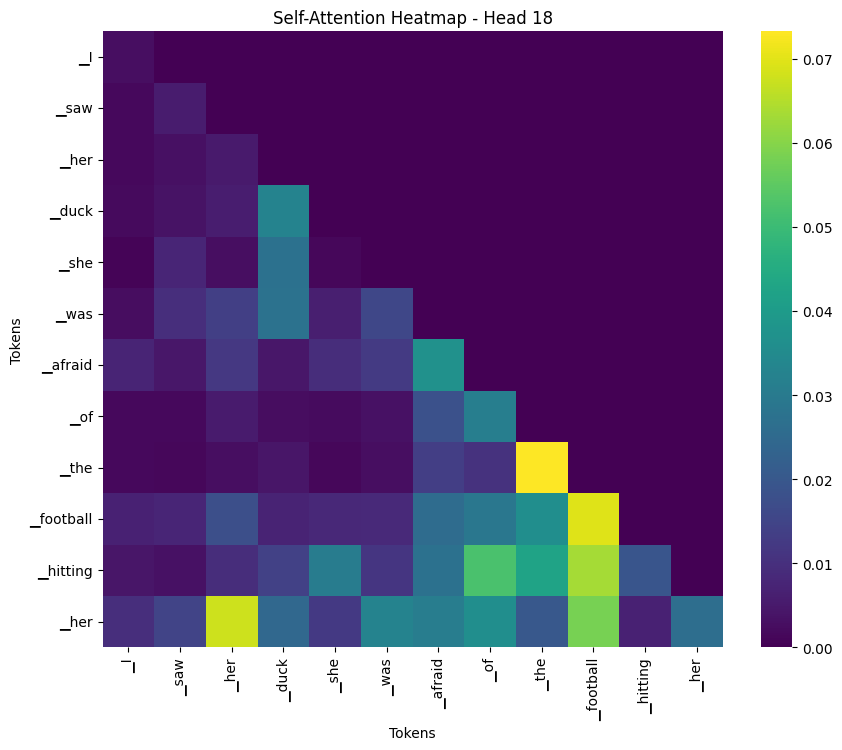

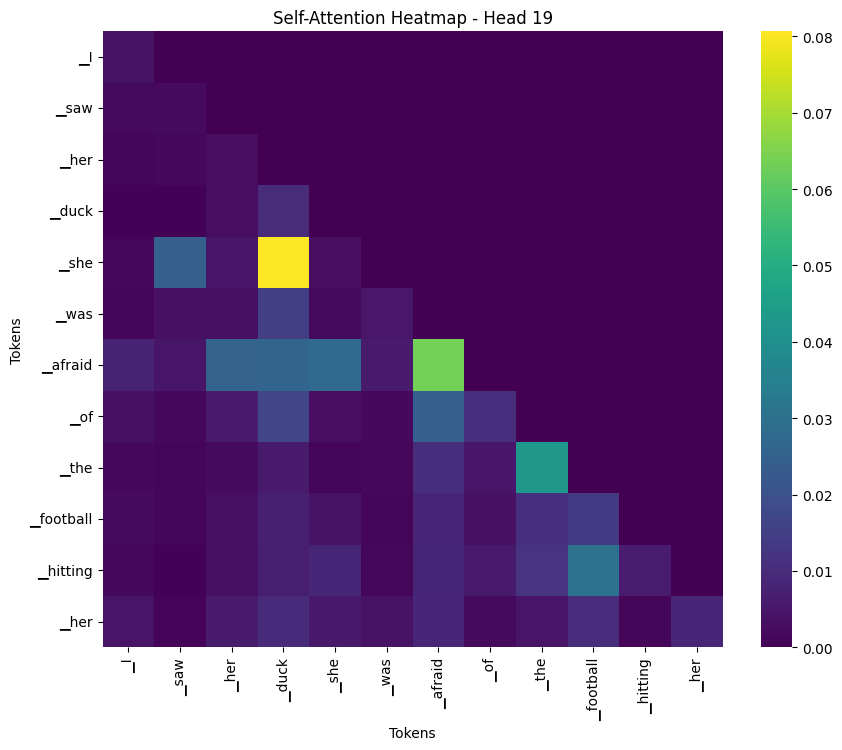

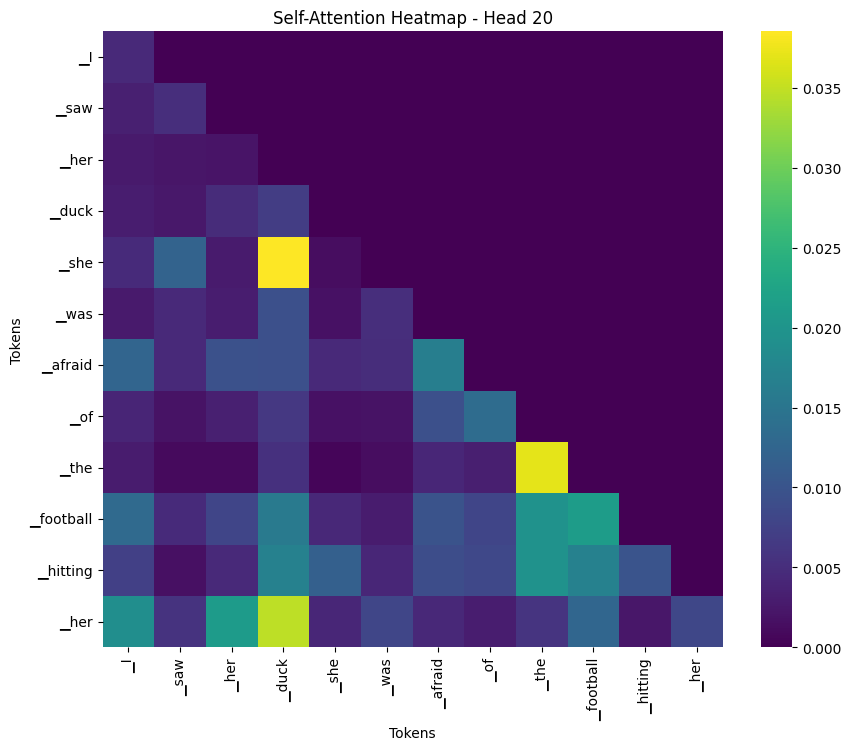

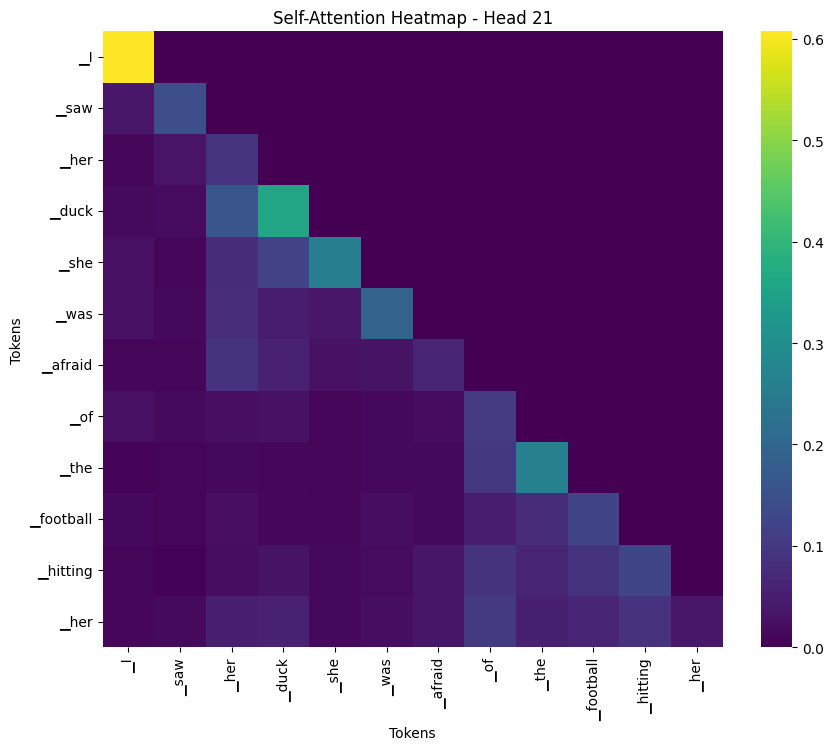

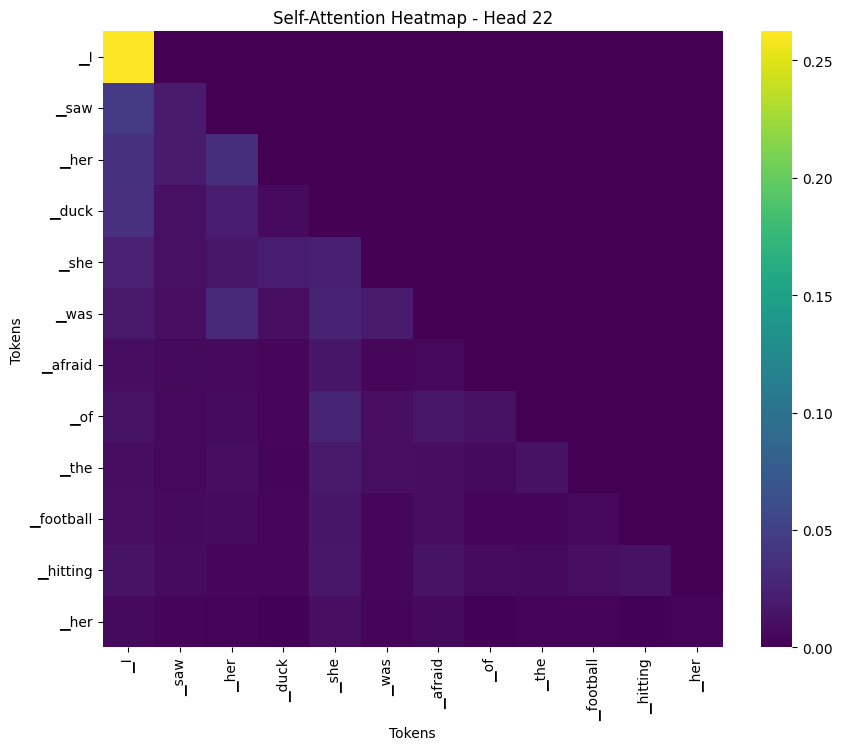

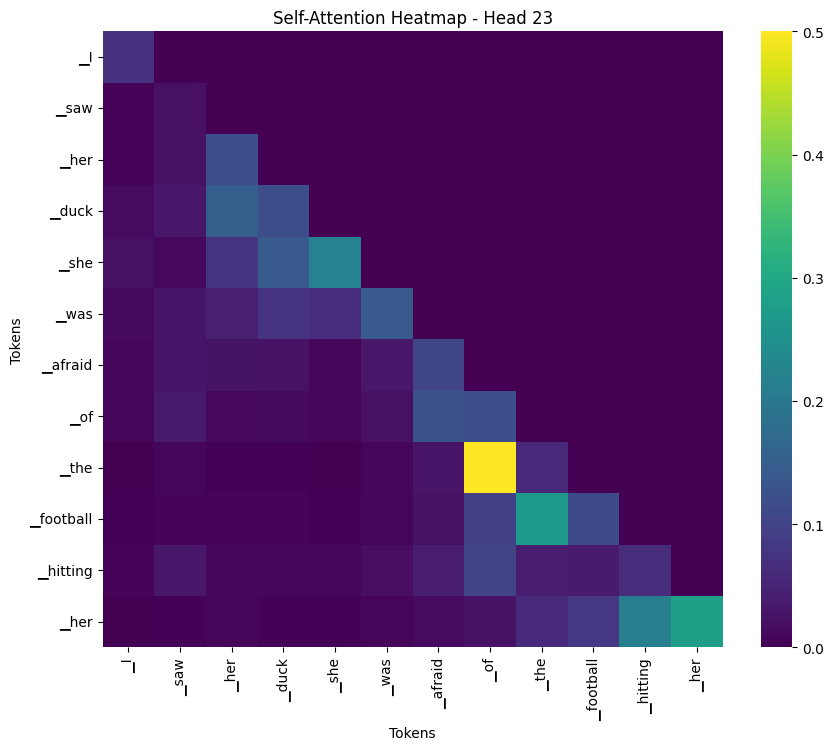

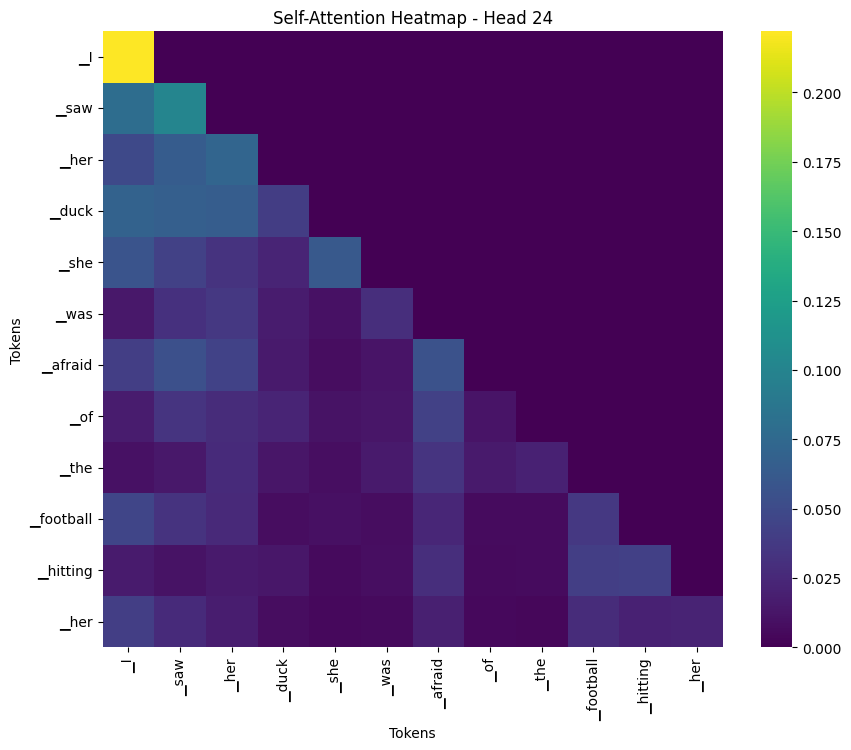

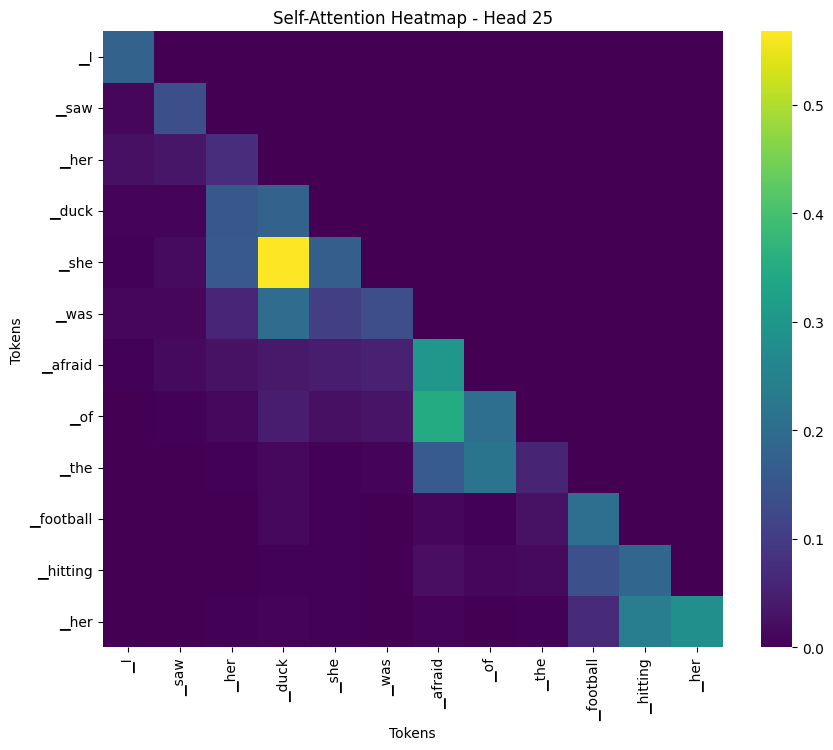

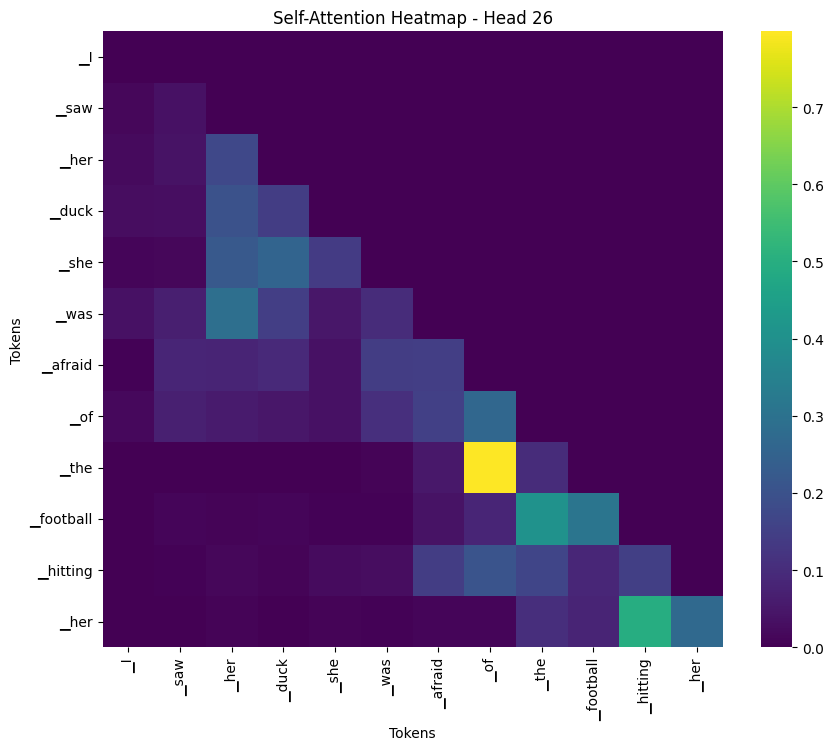

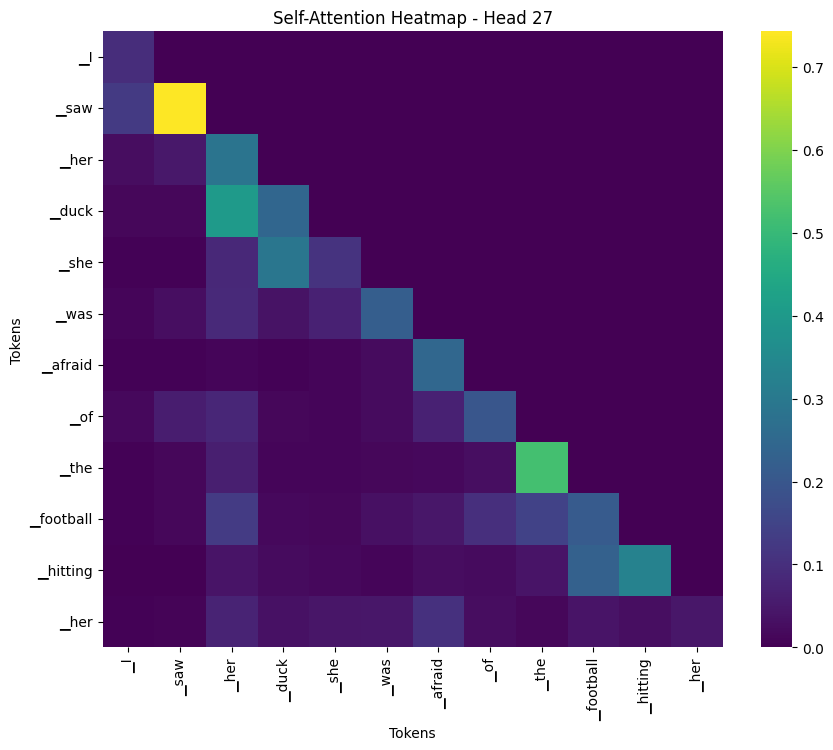

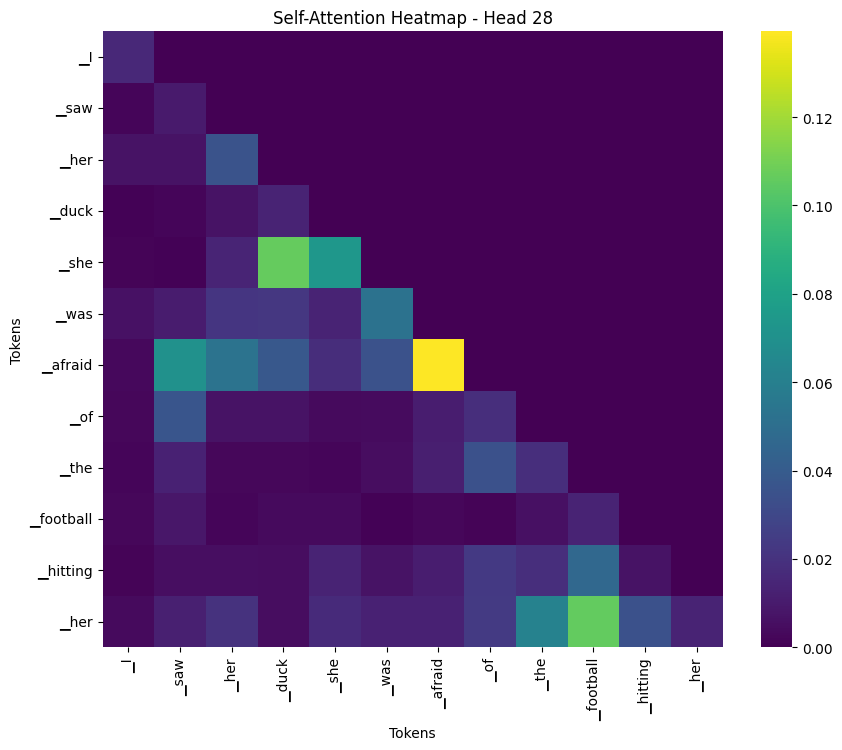

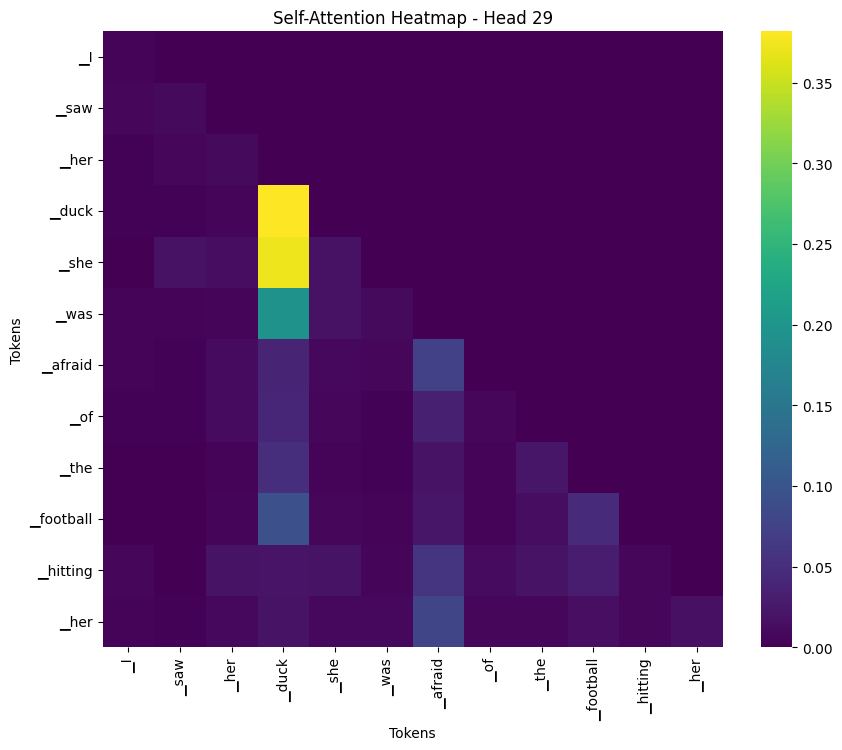

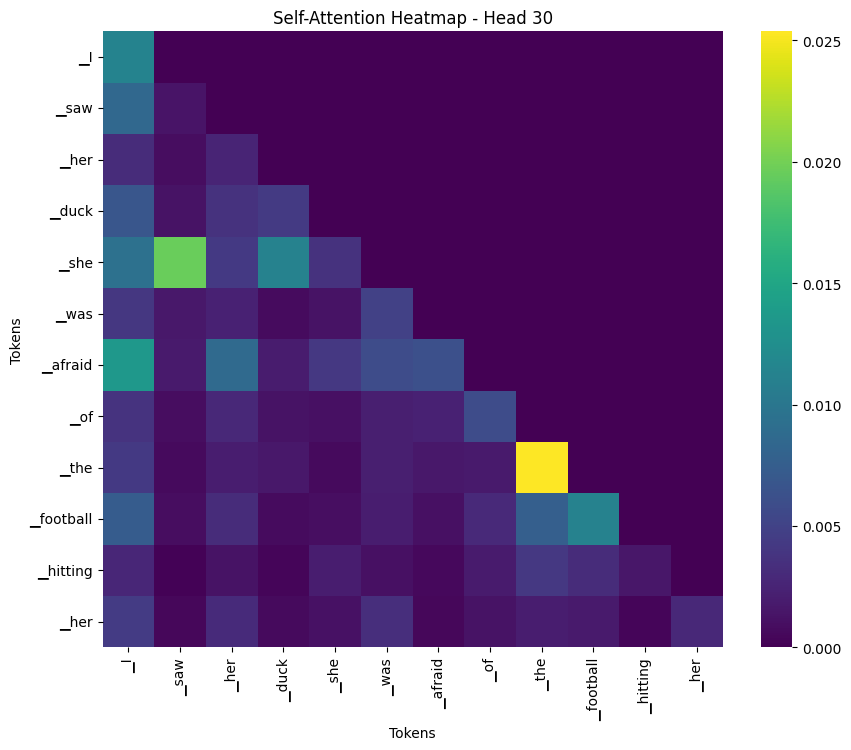

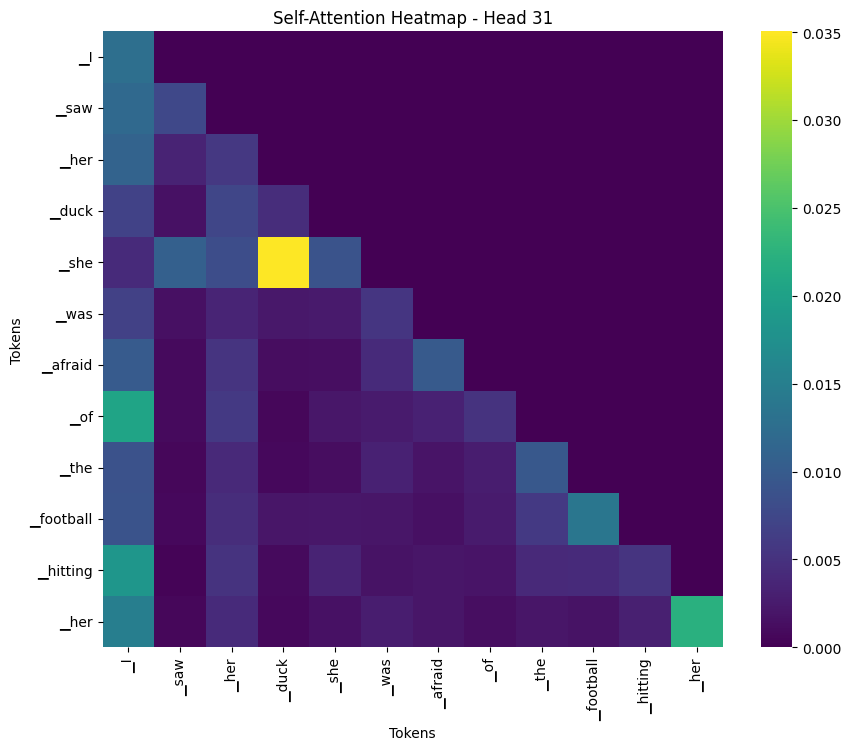

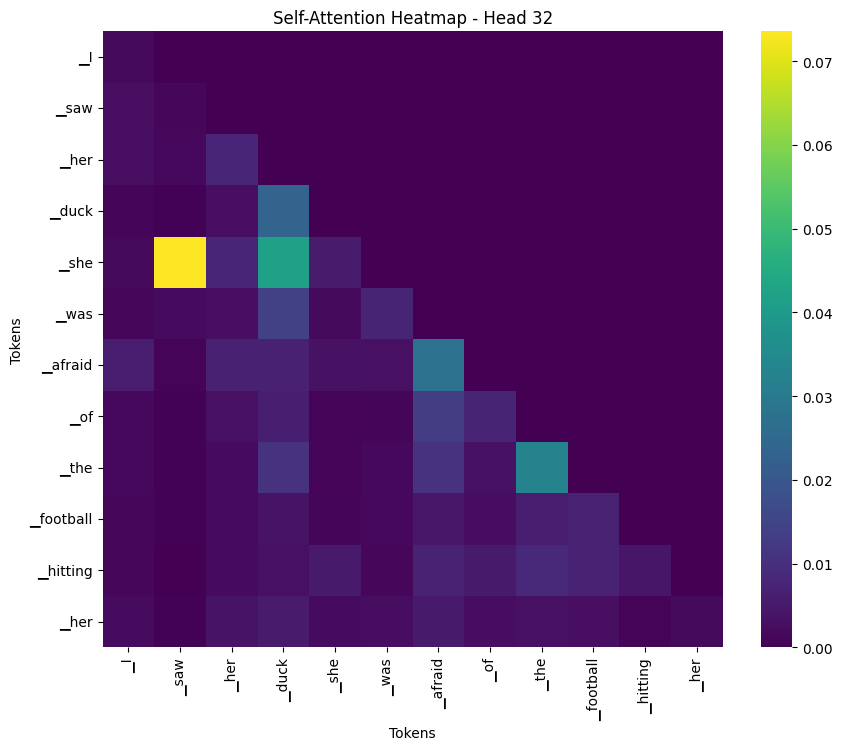

In [7]:
target_text = "I saw her duck she was afraid of the football hitting her"
inputs = tokenizer(target_text, return_tensors="pt")

with torch.no_grad():
    outputs = model(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        output_attentions=True,
        return_dict=True
    )

attentions = outputs.attentions
last_layer_attention = attentions[-1]

tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
special_tokens = tokenizer.all_special_ids
special_token_mask = [token_id not in special_tokens for token_id in inputs["input_ids"][0]]

filtered_attention = last_layer_attention[:, :, special_token_mask, :][:, :, :, special_token_mask]
filtered_tokens = [token for token_id, token in zip(inputs["input_ids"][0], tokens) if token_id not in special_tokens]

num_heads = filtered_attention.shape[1]
for head_idx in range(num_heads):
    head_attention = filtered_attention[0, head_idx].detach().numpy()
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        head_attention,
        xticklabels=filtered_tokens,
        yticklabels=filtered_tokens,
        cmap="viridis"
    )
    plt.title(f"Self-Attention Heatmap - Head {head_idx + 1}")
    plt.xlabel("Tokens")
    plt.ylabel("Tokens")
    plt.show()

# Mean of Attention Heads

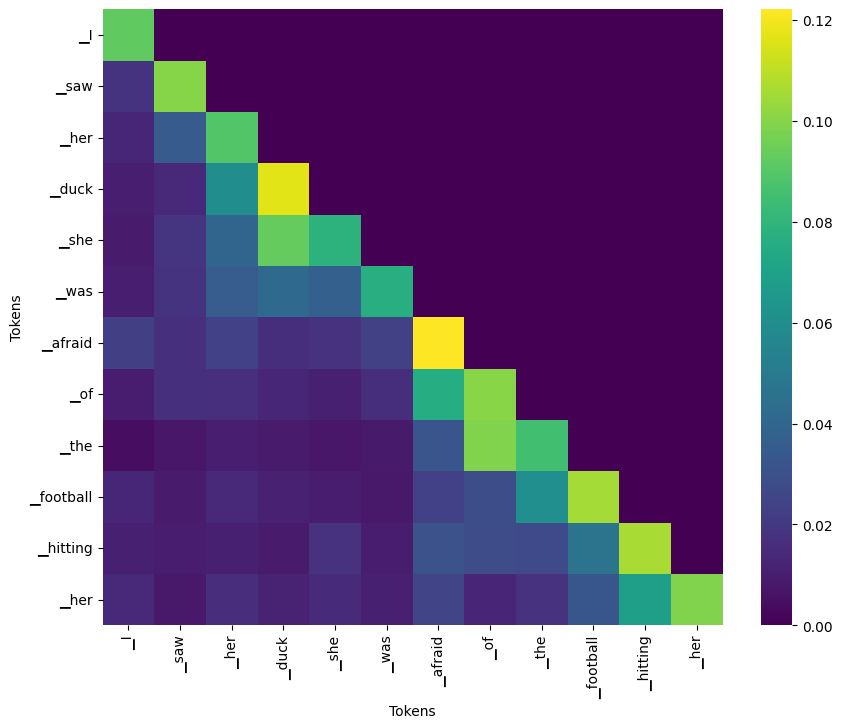

In [9]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

target_text = "I saw her duck she was afraid of the football hitting her"

inputs = tokenizer(target_text, return_tensors="pt")

with torch.no_grad():
    outputs = model(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        output_attentions=True,
        return_dict=True
    )

attentions = outputs.attentions
last_layer_attention = attentions[-1]

tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

special_tokens = tokenizer.all_special_ids
special_token_mask = [token_id not in special_tokens for token_id in inputs["input_ids"][0]]

filtered_attention = last_layer_attention[:, :, special_token_mask, :][:, :, :, special_token_mask]
filtered_tokens = [token for token_id, token in zip(inputs["input_ids"][0], tokens) if token_id not in special_tokens]

mean_attention = filtered_attention.mean(dim=1).squeeze(0).detach().numpy()

plt.figure(figsize=(10, 8))
sns.heatmap(
    mean_attention,
    xticklabels=filtered_tokens,
    yticklabels=filtered_tokens,
    cmap="viridis"
)

plt.xlabel("Tokens")
plt.ylabel("Tokens")
plt.show()
